# Workshop 8 : Image processing with Numpy

ในภาษา Python มี library สำหรับจัดการรูปภาพมากมายเช่น [OpenCV](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html), [SciKit-Image](http://scikit-image.org/) และ [Pillow](http://python-pillow.org/) เป็นต้น ซึ่งจะช่วยให้เราจัดการกับรูปภาพในงานยากๆได้เป็นอย่างดี 

อย่างไรก็ตาม เป้าหมายของเวิร์กชอปนี้ต้องการให้นิสิตเข้าใจพื้นฐานเทคนิคในการทำ image processing ด้วยเหตุนี้เราจึงเลือกใช้ numpy ในการจัดการกับรูปภาพเพราะเป็นเรื่องนิสิตได้ศึกษามาแล้วในชั้นเรียน และใช้ matplotlib ในการนำเข้าและแสดงผลรูปภาพ

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Download File

!wget "https://github.com/5730279821-TA/Workshop4_Resource/raw/master/Ws4_resource.zip"

--2020-11-04 08:37:00--  https://github.com/5730279821-TA/Workshop4_Resource/raw/master/Ws4_resource.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/5730279821-TA/Workshop4_Resource/master/Ws4_resource.zip [following]
--2020-11-04 08:37:00--  https://raw.githubusercontent.com/5730279821-TA/Workshop4_Resource/master/Ws4_resource.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6160172 (5.9M) [application/zip]
Saving to: ‘Ws4_resource.zip.2’

Ws4_resource.zip.2  100%[===================>]   5.87M  20.4MB/s    in 0.3s    

2020-11-04 08:37:01 (20.4 MB/s) - ‘Ws4_resource.zip.2’ saved [6160172/6160

In [3]:
# Extract File

import zipfile
with zipfile.ZipFile("Ws4_resource.zip","r") as zip_ref:
    zip_ref.extractall("")

## Read and Crop

โหลดรูปภาพ "elon_musk.jpg" 

In [4]:
im = plt.imread("elon_musk.jpg")
im.shape

(900, 599, 3)

จะเห็นได้ว่าภาพได้ถูกโหลดเข้ามาใน array ที่มี dimension เป็น 451 x 300 x 3

ซึ่ง 2 ค่าแรก (451 และ 300) แสดงถึง pixel ในแกน Y (ความสูง) และ X(ความกว้าง) ตามลำดับ และค่าสุดท้าย (3) แสดงถึงค่าสี RGB ในภาพนั้น 

ต่อมาเราจะมาดูว่าหน้าตาของภาพนั้นเป็นอย่างไร

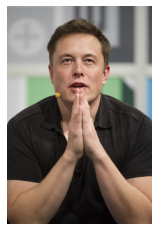

In [5]:
plt.figure(num=None, figsize=(5, 4))
plt.imshow(im)
plt.axis('off')
plt.show()

ภาพข้างต้นเป็นรูปของ Elon Musk ซีอีโอของบริษัท SpaceX 

ถ้าหากว่าเราต้องการแค่บางส่วนของภาพของอย่างเช่นต้องการแค่ "ใบหน้าของ Elon Musk" 

เราสามารถ crop ภาพที่ต้องการได้ โดยใช้ numpy ในการตัดภาพบางส่วนในอาเรย์ของภาพ

<img src="https://www.picz.in.th/images/2018/10/07/hZL4of.png"  width="200">

Tip : หากต้องการเอาตารางออกจากภาพสามารถแทรกคำสั่ง plt.axis("off") ก่อน plt.show() จะทำให้ตารางหายไป

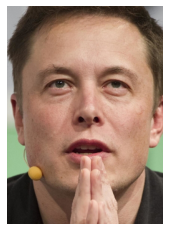

In [6]:
### TO DO 1 : Crop เอาเฉพาะหน้าของ Elon Musk เก็บไว้ในตัวแปร im2
### แก้ไข [ซ้าย:ขวา,บน:ล่าง,:] ดูสิ

### CODE HERE ###########################

im2 =    im[100:450,165:415,:]

#########################################

plt.figure(num=None, figsize=(5, 4))
plt.imshow(im2)
plt.axis("off")
plt.show()

## Colours

แต่ละ pixel ของภาพจะถูกแสดงด้วยตัวเลขจำนวนเต็ม 3 ตัว ซึ่งก็คือค่าของ RGB ที่ผสมกันจนเกิดเป็นสีนั้นๆของภาพขึ้นมา 

ต่อมาเราจะแยกองค์ประกอบของสีโดยการดึง slice ของสีนั้นๆในอาเรย์ของภาพ

<img src="https://www.picz.in.th/images/2018/10/07/hZHmxJ.png"  width="800">

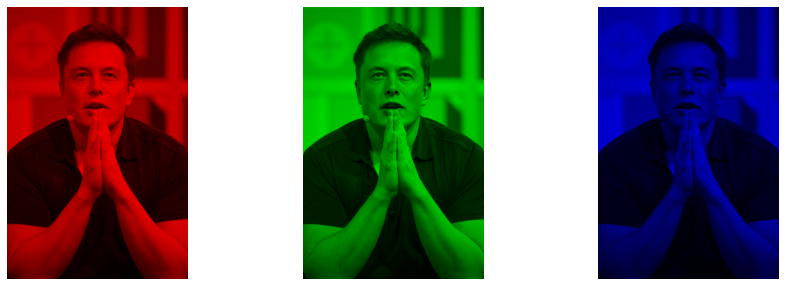

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

### TO DO 2 : จงแยก Channel สีแบ่งเป็น RGB ตามลำดับ (ตามภาพตัวอย่างด้านบน)

# c คือ index และ ax คือ AxesSubplot
for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(im.shape, dtype="uint8")
    
    ### CODE HERE ###########################
    
    tmp_im[:,:,c]=im[:,:,c]
    
    #########################################
    
    ax.axis('off')
    ax.imshow(tmp_im)

## To Greyscale

อีกหัวข้อสำคัญสำหรับเรื่องสีนั่นคือการแปลงภาพ RGB ให้เป็น Greyscale ซึ่งสามารถทำได้หลากหลายวิธีแต่วิธีที่ตรงไปตรงมาที่สุด 

คือการเฉลี่ยค่าสี RGB ของภาพโดยการคูณด้วย weight  ค่าคงที่ BT.601 standard ที่ใช้ในการคำนวนค่าความสว่างของสัญญาณ RGB 

[0.2989, 0.5870, 0.1140] เมื่อนำค่าเหล่านี้ไปคูณในแต่ละ pixel ของสีจะได้ภาพ Greyscale ออกมา 

<img src="https://www.img.in.th/images/f8df6dd73213808cab4ab4b9d58f38f4.png"  width="300">

In [8]:
### TO DO 3-1 : แก้ไขฟังก์ชันให้สามารถแปลงภาพ RGB ให้เป็น Greyscale โดยวิธีการเฉลี่ยค่าสี (ค่าสีบวกกันหาร 3)

def to_grayscale_avg(im):
  
    ### CODE HERE ###########################
    
    grey_value = im.sum(axis=2)/3
    
    #########################################
    return grey_value

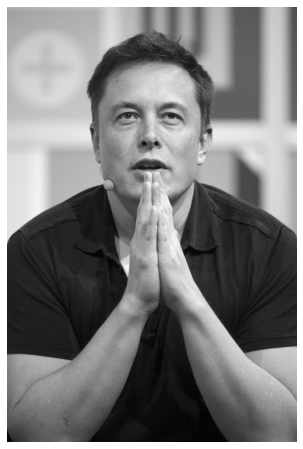

In [9]:
img_avg = to_grayscale_avg(im/255.0)

plt.figure(num=None, figsize=(10, 8))
plt.imshow(img_avg, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [10]:
### TO DO 3-2 : แก้ไขฟังก์ชันให้สามารถแปลงภาพ RGB ให้เป็น Greyscale โดยการคูณค่าคงที่
### Hint : ใช้ np.dot จะได้เร็วๆ

def to_grayscale_w_const(im, weights = [0.2989, 0.5870, 0.1140]):
  
    ### CODE HERE ###########################
    
    return im.dot(weights)
  
    #########################################

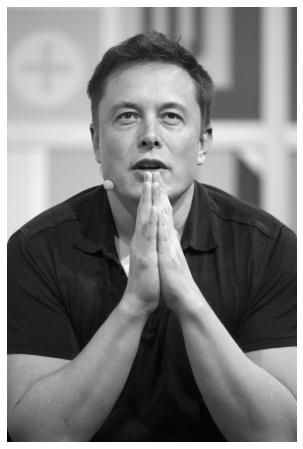

In [11]:
img_gray_w_const = to_grayscale_w_const(im/255.0)

plt.figure(num=None, figsize=(10, 8))
plt.imshow(img_gray_w_const, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

## Image Negatives

เมื่อกลับค่าสีจากค่า "บวก" เป็นค่า "ลบ" บนภาพขาว-ดำ (greyscale) จะทำให้สีขาวและดำกลับกัน

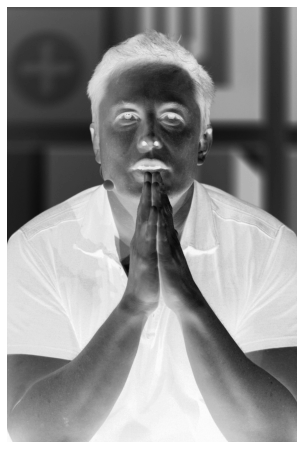

In [12]:
img_neg = 1-(img_gray_w_const)

plt.figure(num=None, figsize=(10, 8))
plt.imshow(img_neg, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

## Sepia Image

จงเขียนฟังก์ชันเพื่อแปลงรูปภาพจากสีให้เป็นรูปสี sepia ด้วยสูตร

R' = np.minimum(1.0, 0.393R + 0.769G + 0.189B)

G' = np.minimum(1.0, 0.349R + 0.686G + 0.168B)

B' = np.minimum(1.0, 0.272R + 0.534G + 0.131B)

จะได้ภาพตามด้านล่าง

<img src="https://www.picz.in.th/images/2018/10/11/kCVXa2.png" width="300">

In [108]:
def sepia(im):
    ### TO DO 4 แปลงภาพสีให้เป็นภาพ Sepia ด้วยสมการข้างต้น ##########################
    
    ### CODE HERE ##############################################################
    img = np.array([np.minimum(1,(im/255.0).dot([0.393,0.769,0.189])).T,np.minimum(1,(im/255.0).dot([0.349,0.686,0.168])).T,np.minimum(1,(im/255.0).dot([0.272,0.534,0.131])).T]).T
    # img=np.zeros(im.shape)
    # img[:,:,0]=np.minimum(1,(im/255.0).dot([0.393,0.769,0.189]))
    # img[:,:,1]=np.minimum(1,(im/255.0).dot([0.349,0.686,0.168]))
    # img[:,:,2]=np.minimum(1,(im/255.0).dot([0.272,0.534,0.131]))
    
    
    
    
    
    
    
    
    
    return img
    #############################################################################

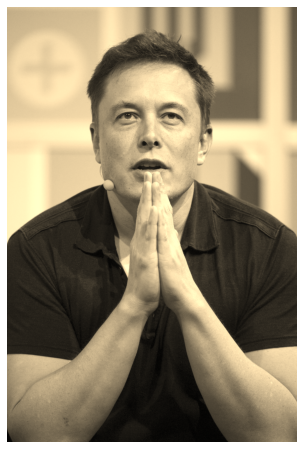

In [109]:
img_sepia = sepia(im)

plt.figure(num=None, figsize=(10, 8))
plt.imshow(img_sepia)
plt.axis('off')
plt.show()

## Convoluted

อีกหนึ่ง operations ที่สามารถนำมาใช้กับรูปภาพได้นั่นคือการ convolution ซึ่งนิยามโดย

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/cfa8253ed8f2f40508e45d0214d7e7d2e77a5c47">

โดยทั่วไปแล้วเราจะแทนที่แต่ละ pixel ด้วย weighted sum ของ pixels ข้างๆ , convolutions นั้นใช้เวลาในการทำนานพอสมควร โดยเฉพาะภาพที่มีขนาดใหญ่ 

มาเริ่มกันเลย !!!

In [110]:
# เพื่อให้ง่ายเราจะทำ Convoluted บนภาพขาว-ดำ (1 channel)
### TO DO 5 : แก้ไขฟังก์ชัน convolute ให้สามารถใช้งานได้อย่างถูกต้อง ######################
### Hint : http://www.youtube.com/watch?v=848P9VbtfjQ&t=15m48s 

def convolute(img,kernel): # assume kernel is a 5x5 matrix
    ims = []
    result = np.ndarray(img.shape)
    for r in range(img.shape[0]-kernel.shape[0]-1):
        for c in range(img.shape[1]-kernel.shape[1]-1):
          
        ### CODE HERE ############################################################
          result[r+1,c+1]=min(1,max(0,np.sum(img[r:r+kernel.shape[0],c:c+kernel.shape[1]]*kernel)))
                
          
          
            
        ##########################################################################
    return result 

In [111]:
def blur(img):
    blur_matrix = np.array([[1/25, 1/25, 1/25, 1/25, 1/25],
                            [1/25, 1/25, 1/25, 1/25, 1/25],
                            [1/25, 1/25, 1/25, 1/25, 1/25],
                            [1/25, 1/25, 1/25, 1/25, 1/25],
                            [1/25, 1/25, 1/25, 1/25, 1/25]])
    img = convolute(img, blur_matrix)
    return img

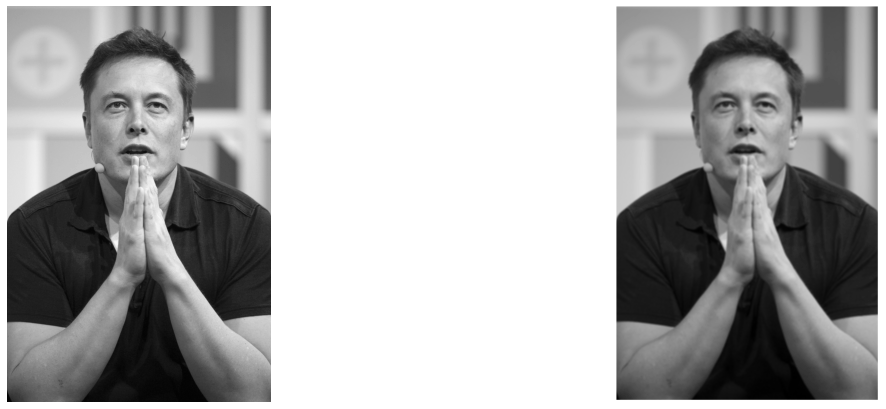

In [112]:
blur_image = blur(img_gray_w_const)

plt.figure(num=None, figsize=(20, 16))
plt.subplot(221)
plt.axis('off')
plt.imshow(img_gray_w_const, cmap=plt.get_cmap('gray'))

plt.subplot(222)
plt.axis('off')
plt.imshow(blur_image, cmap=plt.get_cmap('gray'))
plt.show()

#### Test01

ลองเปลี่ยน kernel เป็น 
np.array( [ [1, 1, 1],  [1,-8, 1], [1, 1, 1] ] ) ดูสิ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


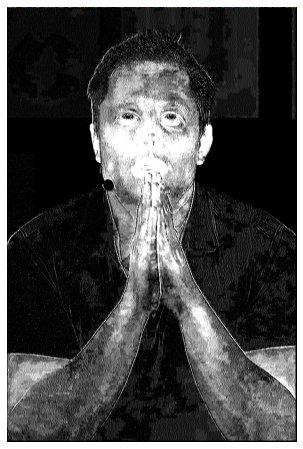

In [18]:
def test01(img):
    blur_matrix = np.array([[1, 1, 1],
                            [1,-8, 1],
                            [1, 1, 1]])
    img = convolute(img, blur_matrix)
    return img

plt.figure(num=None, figsize=(10, 8))
plt.imshow(test01(im/255.0), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

#### Test02

ลองใช้ kernelจาก test01 แต่กลับ input ภาพให้เป็น - ดูสิ

ใส่ -img ก่อนเรียก function convolute

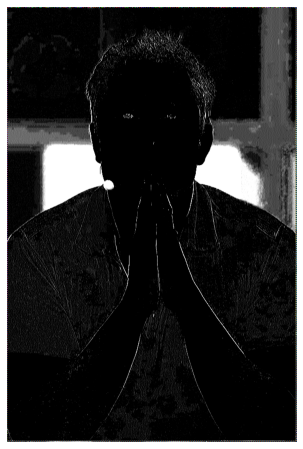

In [19]:
def test02(img):
    blur_matrix = np.array([[1, 1, 1],
                            [1,-8, 1],
                            [1, 1, 1]])
    img = convolute(-img, blur_matrix)
    return img

plt.figure(num=None, figsize=(10, 8))
plt.imshow(test02(im/255.0), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

ลองใช้ Library scipy ในการทำ convolve2d กับภาพสี

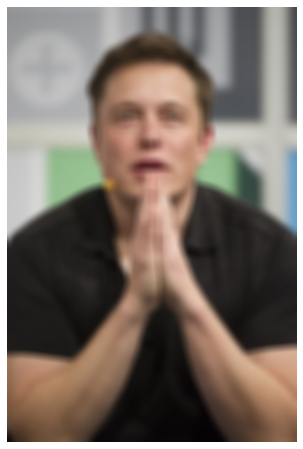

In [20]:
from scipy.signal import convolve2d

def convolve_all_colours(im, window):
    """
    Convolves im with window, over all three colour channels
    """
    ims = []
    for d in range(3):
        im_conv_d = convolve2d(im[:,:,d], window, mode="same", boundary="symm")
        ims.append(im_conv_d)

    im_conv = np.stack(ims, axis=2).astype("uint8")
    return im_conv

### TO DO 6 : สร้าง window size ##########################################
### สร้าง windows size ขนาด 20 x 20 ที่แต่ละpixels มีค่าเท่ากับ (1/ขนาดทั้งหมด)
### จากนั้นเก็บไว้ในตัวแปร window เพื่อใช้ในการ convoluted

### CODE HERE ###########################################################

window=np.ndarray((20,20))
window[:]=1/400




#########################################################################

plt.figure(num=None, figsize=(10, 8))
plt.axis('off')
plt.imshow(convolve_all_colours(im, window))

## Image Scailing

### Scale-Down ( / 2 )

เราจะทำการลดขนาดภาพลงครึ่งนึงโดยการ interpolation (เฉลี่ยค่าสีทั้ง 4 จุด ให้เหลือเพียงค่าเดียว)

<img src="https://www.img.in.th/images/2cd82e812ec82ee08303dea393e79615.gif" width="300" >

In [21]:
### TO DO 7 : Downscale โดยการตัด row และ column ของภาพออกไปแบบ แถวเว้นแถว และ คอมลัมน์เว้นคอลัมน์

def resize_half_cut(img):
  
    ### CODE HERE #########################################################################
    resize_img=img[::2,::2]
    
    
    
    #######################################################################################
    return resize_img

Original size  (900, 599)


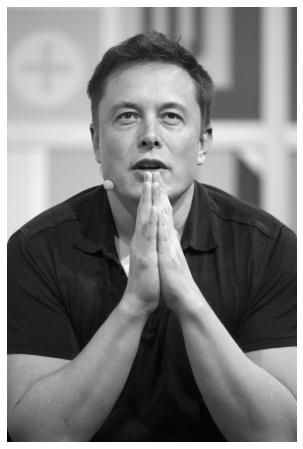

Downscale 50% :  (450, 300)


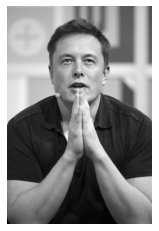

In [22]:
print("Original size ",img_gray_w_const.shape)
plt.figure(num=None, figsize=(10, 8))
plt.axis('off')
plt.imshow(img_gray_w_const, cmap=plt.get_cmap('gray'))
plt.show()

resize_img_cut = resize_half_cut(img_gray_w_const)

print("Downscale 50% : ",resize_img_cut.shape)
plt.figure(num=None, figsize=(5, 4))
plt.axis('off')
plt.imshow(resize_img_cut, cmap=plt.get_cmap('gray'))
plt.show()

In [23]:
### TO DO 8 : ทำการ interpolation โดยการใช้ filter ขนาด [[0.25, 0.25][0.25,0.25]] ##############
# Recommend : ใช้ library convolve2d จากด้านบนในการทำ convolute #################################
# Hint : เลือกเอาเฉพาะ [:img.shape[0]:2,:img.shape[1]:2] จะได้ภาพขนาดครึ่งนึงหลังจาก convolve แล้ว

def resize_half(img):
  
    ### CODE HERE #########################################################################
    resize_img=convolve2d(img,[[0.25, 0.25],[0.25,0.25]],mode="same",boundary="symm")[:img.shape[0]:2,:img.shape[1]:2]
    
    
    
    #######################################################################################
    return resize_img

Original size  (900, 599)


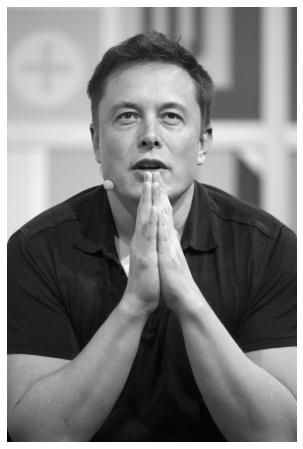

Downscale 50% :  (450, 300)


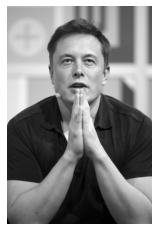

In [24]:
print("Original size ",img_gray_w_const.shape)
plt.figure(num=None, figsize=(10, 8))
plt.axis('off')
plt.imshow(img_gray_w_const, cmap=plt.get_cmap('gray'))
plt.show()

resize_img = resize_half(img_gray_w_const)

print("Downscale 50% : ",resize_img.shape)
plt.figure(num=None, figsize=(5, 4))
plt.axis('off')
plt.imshow(resize_img, cmap=plt.get_cmap('gray'))
plt.show()

### Scale-Up ( x 2 )

เราจะทำการขยายภาพขึ้นเป็นสองเท่าโดยการเพิ่ม row และ column ขึ้นมาเป็น 2 เท่า

In [29]:
### TO DO 9 : เพิ่มขนาดของภาพขึ้น 2 เท่าโดยการเพิ่มแต่ละ row และแต่ละ column ขึ้นเป็น 2 เท่า
def scale_up_normal(img):
  
  ### CODE HERE #########################################################################
  scale_up_img=np.ndarray((img.shape[0]*2,img.shape[1]*2,3))
  scale_up_img[::2,::2]=img
  scale_up_img[1::2,::2]=img
  scale_up_img[::2,1::2]=img
  scale_up_img[1::2,1::2]=img
  
  
  
  
  
  ######################################################################################
  return scale_up_img

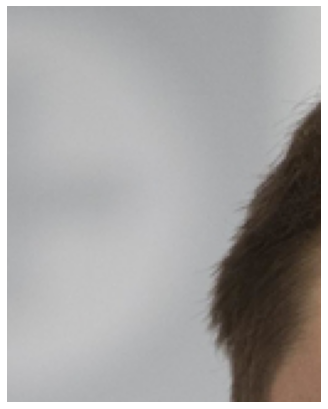

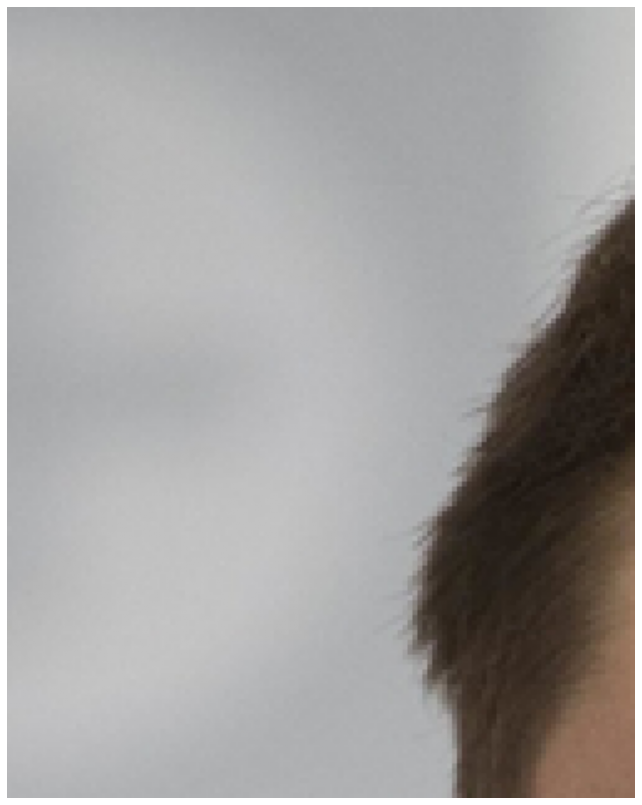

(1800, 1198, 3)


In [30]:
new_img = scale_up_normal(im)

plt.figure(num=None, figsize=(10, 16))
plt.subplot(211)
plt.axis('off')
plt.imshow(im[50:210,83:210,:])

plt.figure(num=None, figsize=(20, 32))
plt.subplot(212)
plt.imshow(new_img[100:420,166:420,:]/255.0)
plt.axis('off')
plt.show()

print(new_img.shape)

In [31]:
### TO DO 10 : เพิ่มขนาดของภาพขึ้น 2 เท่าโดยการเพิ่ม row และ column ขึ้นเป็น 2 เท่าโดยการใช้ฟังก์ชัน numpy.repeat()
### Hint : https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.repeat.html

def scale_up(img):
  
  ### CODE HERE ################################################################
  
  scale_up_img = np.repeat(img, 2, axis=1)
  scale_up_img = np.repeat(scale_up_img, 2, axis=0)
  
  ##############################################################################
  return scale_up_img

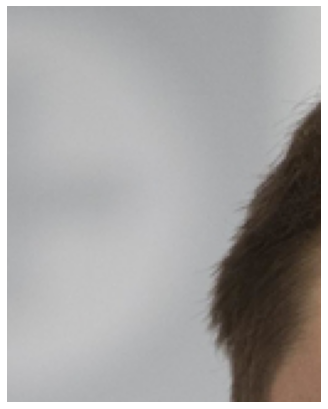

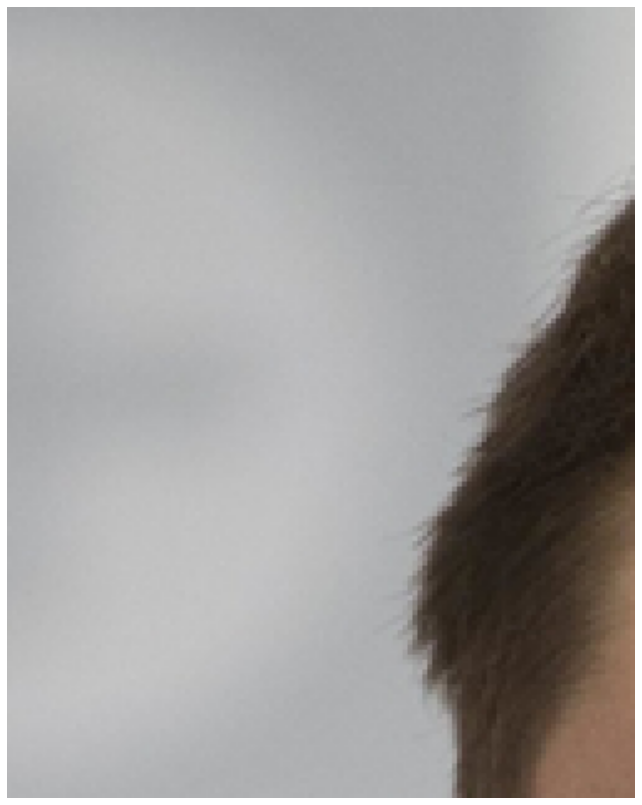

In [32]:
plt.figure(num=None, figsize=(10, 16))
plt.subplot(211)
plt.axis('off')
plt.imshow(im[50:210,83:210,:])

plt.figure(num=None, figsize=(20, 32))
plt.subplot(212)
plt.imshow(scale_up(im)[100:420,166:420,:])
plt.axis('off')
plt.show()

## Find Distance : การหาระยะห่างระหว่างธนบัตร

### Lab 1 : Demo on Ruler

ไม้บรรทัดมีความยาว 15 cm และธนบัตรอยู่ติดขอบที่สเกล 0 cm และ 15 cm พอดี 

<img src="https://www.img.in.th/images/fc145de26aa2952ab19a91826a7e5fa2.png" width=600>

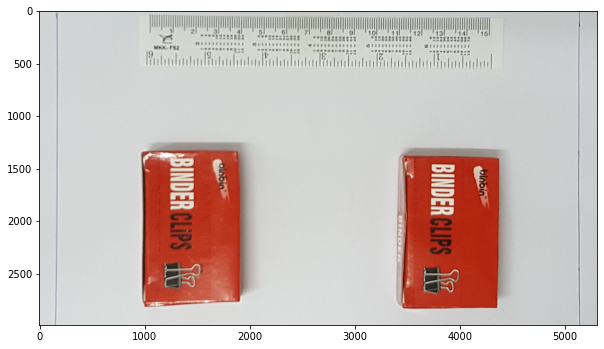

In [33]:
### โหลดภาพเข้ามาและแสดงผลลัพธ์ของภาพนั้น

demo_img = plt.imread("d_demo.jpg")
plt.figure(num=None, figsize=(10, 8))
plt.imshow(demo_img)

plt.show()

#### Crop Ruler
ครอบภาพโดยเอาเฉพาะธนบัตรดังตัวอย่างด้านล่าง

<img src="https://www.img.in.th/images/0072ff20975e60d07c0c4d659fc3dba6.png" width="600">

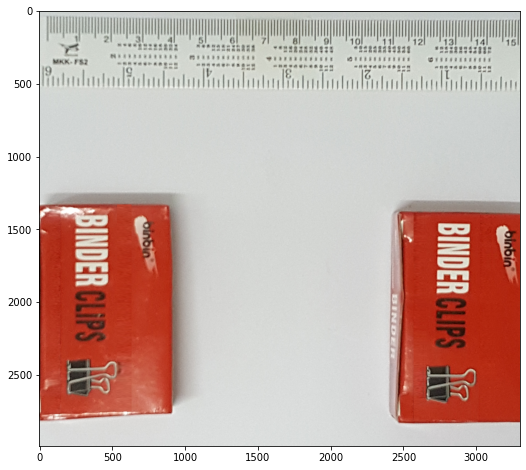

In [37]:
### TO DO 11-1 : เนื่องจากธนบัตรอยู่บริเวณขอบของไม้บรรทัดพอดีขอบ 0 และ 15 
###              จง CROP ภาพบริเวณพื้นที่ว่างซ้ายและขวาออก ให้ธนบัตรติดขอบรูปดังภาพด้านบน

#### CODE HERE : CROP IMAGE ###################################################

demo_img_crop = demo_img[:,1000:4300]

###############################################################################

plt.figure(num=None, figsize=(10,8))
plt.imshow(demo_img_crop)
plt.show()

#### Convert to Greyscale

แปลงภาพให้เป็น Greyscale จะทำให้ง่ายต่อการคำนวนระยะห่าง


<img src="https://www.img.in.th/images/8d98d8f9e4378cb627a5e95b51299a8a.png" width="600">

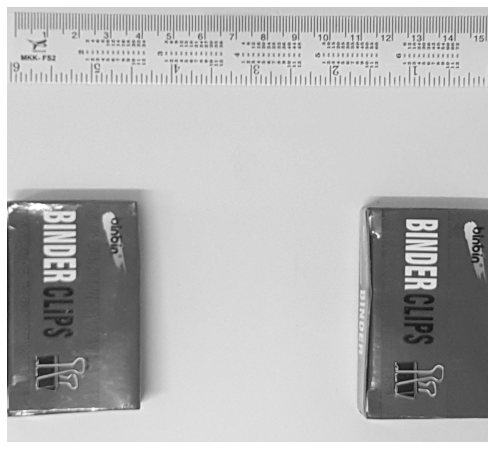

In [38]:
### TO DO 11-2 : แปลงภาพ RGB (ภาพสี) ให้เป็นภาพ GREYSCALE ด้วยฟังก์ชันที่เคยสร้างมา

#### CODE HERE : GREYSCALE #################################################

demo_img_grey = to_grayscale_w_const(demo_img_crop)

############################################################################

plt.figure(num=None, figsize=(10,8))
plt.axis("off")
plt.imshow(demo_img_grey, cmap=plt.get_cmap('gray'))
plt.show()

รวมค่าสีในแนวตั้งจากนั้น plot กราฟค่าสีดังจะได้หน้าตาดังภาพภาพ

<img src="https://www.img.in.th/images/daef9ed1b4001e20fb285c2b8dcc320b.png" width="600">

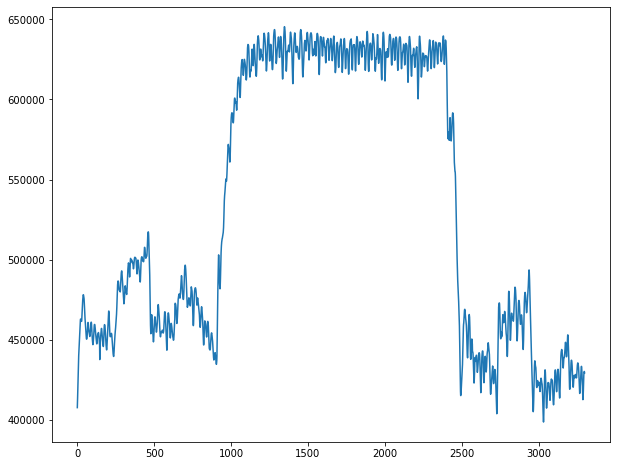

In [39]:
### TO DO 11-3 : หาผลรวมของสีในภาพตามแนวแกนตั้ง (axis=0) เพื่อใช้ในการวิเคราะห์ระยะทาง

### CODE HERE : CALCULATE COLOR VALUE #########################################

demo_sum = demo_img_grey.sum(axis=0)

##############################################################################

plt.figure(num=None, figsize=(10,8))
plt.plot(np.arange(len(demo_sum)),demo_sum)

In [40]:
# แสดงความกว้างในแนวนอนของภาพในหน่วย pixels

print('ภาพกว้าง' , demo_img_grey.shape[1])

ภาพกว้าง 3300


In [117]:
### TO DO 11-4 : หาคำตอบว่าระยะห่างของธนบัตรเป็นเท่าใด จากกราฟที่สร้างขึ้นมา
### Hint : เรารุ้ว่าความกว้างของภาพจะยาวเท่ากับไม้บรรทัด ถ้าหาว่าวัตถุห่างกันกี่ pixel ก็แปลงกลับมาเป็น cm ได้

lpos=0
rpos=0
threshold=(np.sum(demo_sum)/len(demo_sum))
activate=False
for i in range(len(demo_sum)-25):
  if np.sum(demo_sum[i:i+25]<threshold)>20:activate=True
  if activate:
    if np.sum(demo_sum[i:i+25]>threshold)>20 and lpos==0:
      lpos=i
    if rpos==0 and lpos!=0 and np.sum(demo_sum[i:i+25]<threshold)>20:
      rpos=i
# print(lpos,rpos)
print((rpos-lpos)*(15/demo_img_grey.shape[1]))
# print((2500-1000)*(15/3300))







6.8590909090909085


ภาพกว้าง      3250 pixels           

ไม้บรรทัดยาว  15 cm

ธนบัตรห่างกัน 2415(ค่า max) - 902(ค่า min) = 1513 pixels  

ความยาวบนไม้บรรทัด =  (15*1513)/3250 = 6.98 cm (ของจริง ~ 7.0 cm)

### Lab 2 : Universal distance measurement


In [97]:
### TO DO 12 : เขียนฟังก์ชันคำนวนระยะของธนบัตรสำหรับภาพใดๆ โดยข้อมูลที่จะใช้จะเป็นอีกชุดนึงที่ถ่ายด้วยกล้องตำแหน่งเดียวกันหมด
### ผลลัพธ์ของฟังก์ชันจะ return ระยะห่างของธนบัตรในหน่วย cm

def get_distance(img_name):
  
  ### CODE HERE ################################################################
  img=plt.imread(img_name)
  img_crop = img[:,1000:4300]
  img_gray_scale=to_grayscale_w_const(img_crop)
  img_sum=img_gray_scale.sum(axis=0)
  lpos=0
  rpos=0
  threshold=(np.sum(img_sum)/len(img_sum))
  activate=False
  for i in range(len(img_sum)-25):
    if np.sum(img_sum[i:i+25]<threshold)>20:activate=True
    if activate:
      if np.sum(img_sum[i:i+25]>threshold)>20 and lpos==0:
        lpos=i
      if rpos==0 and lpos!=0 and np.sum(img_sum[i:i+25]<threshold)>20:
        rpos=i
  obj_dis=((rpos-lpos)*(15/img_gray_scale.shape[1]))

  # plt.figure(num=None, figsize=(10,8))
  # plt.plot(np.arange(len(img_sum)),img_sum)
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  ##############################################################################
  
  return obj_dis
  

In [98]:
def feed_img():
  print("Lab_CV_1 distance = %.2f cm" % get_distance("lab_cv_1.jpg"))
  print("Lab_CV_2 distance = %.2f cm" % get_distance("lab_cv_2.jpg"))
  print("Lab_CV_2 distance = %.2f cm" % get_distance("lab_cv_3.jpg"))
  
feed_img()

Lab_CV_1 distance = 3.74 cm
Lab_CV_2 distance = 1.70 cm
Lab_CV_2 distance = 3.35 cm
